In [90]:
import detectron2
from detectron2.utils.logger import setup_logger

setup_logger()

# import some common libraries
import matplotlib.pyplot as plt
import cv2
import numpy as np

from PIL import Image

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

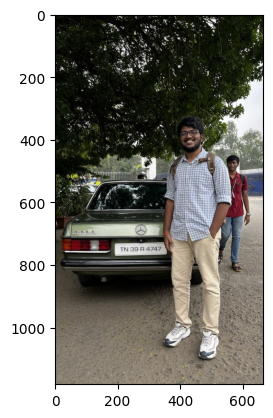

In [91]:
im = cv2.imread("./datasets/people/D35D0AF4-FDAA-4520-8848-6AEEACCEF653_1_105_c.jpeg")
# im = Image.open("./datasets/people/D35D0AF4-FDAA-4520-8848-6AEEACCEF653_1_105_c.jpeg")

# def image_to_cv2(image):
#     return cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

In [99]:
cfg = get_cfg()
cfg.MODEL.DEVICE = 'cpu'
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")

In [100]:
predictor = DefaultPredictor(cfg)

outputs = predictor(im)

[09/13 07:53:06 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_101_FPN_3x/137851257/model_final_f6e8b1.pkl ...


In [101]:
arr = outputs['instances'].to("cpu").pred_classes.numpy()
print(arr)
arr = arr[arr!=0]
arr

[ 0  0  2  0 24  2]


array([ 2, 24,  2])

In [111]:
outputs['instances'].pred_boxes.tensor.numpy().tolist()

[[337.9528503417969, 320.0853576660156, 563.4361572265625, 1100.2557373046875],
 [521.8104248046875, 449.2493896484375, 625.0308837890625, 824.6611938476562],
 [32.47319793701172, 522.4902954101562, 520.0047607421875, 877.3364868164062],
 [262.5866394042969, 511.0292663574219, 287.9609680175781, 528.7788696289062],
 [370.0408020019531, 444.2521057128906, 514.6615600585938, 526.6558227539062],
 [64.08635711669922, 543.4645385742188, 134.73692321777344, 574.3450317382812]]

In [102]:
outputs["instances"].to("cpu").pred_classes, outputs["instances"].to("cpu").scores

(tensor([ 0,  0,  2,  0, 24,  2]),
 tensor([0.9995, 0.9983, 0.9581, 0.9555, 0.8464, 0.8218]))

In [103]:
outputs["instances"].to("cpu").pred_boxes.tensor.numpy()

array([[ 337.95285 ,  320.08536 ,  563.43616 , 1100.2557  ],
       [ 521.8104  ,  449.2494  ,  625.0309  ,  824.6612  ],
       [  32.473198,  522.4903  ,  520.00476 ,  877.3365  ],
       [ 262.58664 ,  511.02927 ,  287.96097 ,  528.7789  ],
       [ 370.0408  ,  444.2521  ,  514.66156 ,  526.6558  ],
       [  64.08636 ,  543.46454 ,  134.73692 ,  574.34503 ]],
      dtype=float32)

In [104]:
for i in arr:
    print(MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes[i])

car
backpack
car


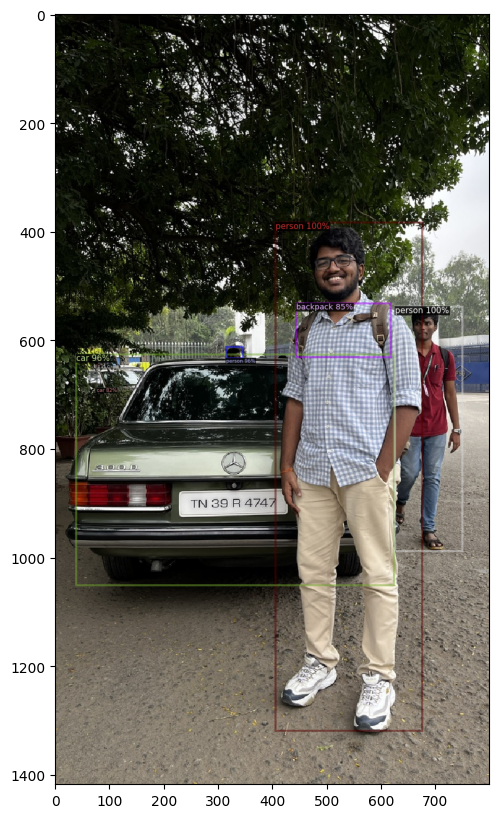

In [105]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize=(14, 10))
plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))